In [15]:
import pandas as pd

In [16]:
Data = pd.read_csv(r"D:\ALGORITMO RECLUTADOR\Proyecto 19-01.remplazo\Todo el proyecto\Data Posición\Porteros.csv")
pd.set_option('display.max_columns', None)
Data

,Name,Interceptions,Penalty committed,Errors lead to goal,Dribbled past,Total passes,Accurate passes %,Accurate long balls %,Saves,Clean sheets,Penalties faced,Penalties saved,Goals conceded inside the box,Goals conceded outside the box,Aerial duels won %,Total duels won %,Appearances,Age Range,Position,League,Level
0,Brian Heras,0.00,0.0,0.00,0.00,23.71,54.52,43.08,4.21,0.50,0.21,0.00,0.57,0.14,66.67,85.71,14,2,1,Ecuador Serie A,3
1,Alexander Domínguez,0.00,0.0,0.00,0.00,23.00,77.13,53.85,3.41,0.52,0.15,0.07,0.52,0.07,100.00,100.00,27,3,1,Ecuador Serie A,3
2,Rafael Romo,0.00,0.0,0.00,0.09,24.65,74.60,43.93,4.04,0.43,0.13,0.00,1.09,0.04,75.00,75.00,23,3,1,Ecuador Serie A,3
3,Hernán Galíndez,0.00,0.0,0.00,0.04,24.91,57.59,35.85,4.04,0.43,0.13,0.00,1.00,0.17,50.00,60.00,23,3,1,Ecuador Serie A,3
4,Pedro Ortiz,0.00,0.0,0.00,0.03,21.00,68.89,41.46,3.37,0.47,0.27,0.03,0.80,0.13,100.00,85.71,30,3,1,Ecuador Serie A,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,Leonardo Burián,0.05,0.0,0.00,0.05,23.00,68.19,45.20,1.95,0.32,0.11,0.00,0.74,0.11,88.89,80.00,19,3,1,Argentina LPF,2
922,Marcos Ledesma,0.06,0.0,0.11,0.06,24.39,38.04,28.38,3.11,0.28,0.17,0.06,0.89,0.28,66.67,71.43,18,2,1,Argentina LPF,2
923,Gabriel Arias,0.00,0.0,0.04,0.13,25.54,72.10,39.35,2.42,0.25,0.08,0.00,1.04,0.21,83.33,75.00,24,3,1,Argentina LPF,2
924,Federico Lanzillota,0.07,0.0,0.07,0.07,27.07,81.27,50.00,1.79,0.43,0.14,0.00,0.79,0.29,50.00,62.50,14,3,1,Argentina LPF,2


In [17]:
Saves_media = Data["Saves"].mean()
Saves_min = Data["Saves"].min()
Saves_max = Data["Saves"].max()
print(Saves_media)
print(Saves_min)
print(Saves_max)

print("-"*100)

Clean_sheets_media = Data["Clean sheets"].mean()
Clean_sheets_min = Data["Clean sheets"].min()
Clean_sheets_max = Data["Clean sheets"].max()
print(Clean_sheets_media)
print(Clean_sheets_min)
print(Clean_sheets_max)

print("-"*100)

pases_media = Data["Accurate passes %"].mean()
pases_min = Data["Accurate passes %"].min()
pases_max = Data["Accurate passes %"].max()
print(pases_media)
print(pases_min)
print(pases_max)

print("-"*100)

duels_won_media = Data["Total duels won %"].mean()
duels_won_min= Data["Total duels won %"].min()
duels_won_max = Data["Total duels won %"].max()
print(duels_won_media)
print(duels_won_min)
print(duels_won_max)

2.8811663066954645
1.17
5.0
----------------------------------------------------------------------------------------------------
0.28301295896328293
0.0
0.7
----------------------------------------------------------------------------------------------------
64.07237580993521
31.36
89.96
----------------------------------------------------------------------------------------------------
82.53186825053996
0.0
100.0


In [18]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import unicodedata
import matplotlib.pyplot as plt


Columna_habilidades = Data.columns.drop(["Name", "League"])

features = Data[Columna_habilidades]

# Crea un objeto StandardScaler
scaler = StandardScaler()

# Ajusta el escalador a tus datos y luego transforma tus datos
features_scaled = scaler.fit_transform(features)

# Inicializa el modelo NearestNeighbors
model = NearestNeighbors(n_neighbors=6)  # Buscamos 6 vecinos porque uno de ellos será el jugador mismo

# Ajusta el modelo a tus datos
model.fit(features_scaled)

caracteristicas_grafico = ['Saves', 'Clean sheets', 'Total duels won %', 'Penalties saved', 'Goals conceded inside the box', 'Goals conceded outside the box', 'Accurate long balls %']

# Función para normalizar nombres (ignorar mayúsculas y acentos)
def normalizar_nombre(nombre):
    nombre = nombre.lower()
    nombre = unicodedata.normalize('NFD', nombre)
    nombre = nombre.encode('ascii', 'ignore').decode("utf-8")
    return nombre

def buscar_jugadores_similares(nombre, caracteristicas_grafico):
    # Normaliza el nombre que buscas
    nombre_normalizado = normalizar_nombre(nombre)

    # Aplica la normalización a los nombres en el conjunto de datos
    Data['Name_Normalized'] = Data['Name'].apply(normalizar_nombre)

    # Busca el jugador con el nombre normalizado
    jugador = Data[Data['Name_Normalized'] == nombre_normalizado]

    if len(jugador) == 0:
        return 'Jugador no encontrado'
    else:
        jugador_scaled = scaler.transform(jugador[features.columns])
        distancias, indices = model.kneighbors(jugador_scaled)
        jugadores_similares = Data.iloc[indices[0]]  # Excluimos el primer resultado porque será el jugador mismo

        display(jugadores_similares)

        # Escala todas las características de los jugadores similares
        jugadores_similares_scaled = scaler.transform(jugadores_similares[features.columns])

        # Define una lista de colores
        colores = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']

        # Crea un gráfico de radar para cada jugador similar
        fig = go.Figure()
        for i, row in enumerate(jugadores_similares_scaled):
            color = colores[i % len(colores)]  # Elige un color de la lista
            fig.add_trace(go.Scatterpolar(
                r=row[features.columns.isin(caracteristicas_grafico)],
                theta=caracteristicas_grafico,
                fill='toself',
                name=jugadores_similares.iloc[i]['Name'],
                line=dict(color=color)
            ))

        fig.update_layout(
            autosize=False,
            width=800,
            height=800,
            polar=dict(
                radialaxis=dict(
                    visible=True,
                    range=[-2, 10]  # Ajusta este rango según tus datos
                )),
            showlegend=True
        )
        fig.show()
        
       # Configura una cuadrícula de subplots con 2 filas y 2 columnas
        fig, axs = plt.subplots(2, 2, figsize=(20, 12))  # Ajusta el tamaño según sea necesario

        # Gráfico de dispersión para la media-Goals
        for i, name in enumerate(jugadores_similares['Name']):
            axs[0, 0].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Saves'], color=colores[i % len(colores)], marker='o')
        for line in [Saves_max, Saves_media, Saves_min]:
            axs[0, 0].axhline(y=line, color='r', linestyle='--')
        axs[0, 0].set_title('Comparativa de Salvadas de los jugadores similares')
        axs[0, 0].set_xticks(range(len(jugadores_similares)))
        axs[0, 0].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[0, 0].set_xlabel('Jugadores')
        axs[0, 0].set_ylabel('Saves')

        # Gráfico de dispersión para la media-Successful
        for i, name in enumerate(jugadores_similares['Name']):
            axs[0, 1].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Clean sheets'], color=colores[i % len(colores)], marker='o')
        for line in [Clean_sheets_max, Clean_sheets_media, Clean_sheets_min]:
            axs[0, 1].axhline(y=line, color='r', linestyle='--')
        axs[0, 1].set_title('Comparativa de Porteria limpia de los jugadores similares')
        axs[0, 1].set_xticks(range(len(jugadores_similares)))
        axs[0, 1].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[0, 1].set_xlabel('Jugadores')
        axs[0, 1].set_ylabel('Clean sheets')

        # Gráfico de dispersión para la media-Accurate passes %
        for i, name in enumerate(jugadores_similares['Name']):
            axs[1, 0].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Accurate passes %'], color=colores[i % len(colores)], marker='o')
        for line in [pases_max, pases_media, pases_min]:
            axs[1, 0].axhline(y=line, color='r', linestyle='--')
        axs[1, 0].set_title('Comparativa de Pases efectivos de los jugadores similares')
        axs[1, 0].set_xticks(range(len(jugadores_similares)))
        axs[1, 0].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[1, 0].set_xlabel('Jugadores')
        axs[1, 0].set_ylabel('shots')

        # Gráfico de dispersión para la media-Total duels won %
        for i, name in enumerate(jugadores_similares['Name']):
            axs[1, 1].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Total duels won %'], color=colores[i % len(colores)], marker='o')
        for line in [duels_won_max, duels_won_media, duels_won_min]:
            axs[1, 1].axhline(y=line, color='r', linestyle='--')
        axs[1, 1].set_title('Comparativa de Duelos ganados de los jugadores similares')
        axs[1, 1].set_xticks(range(len(jugadores_similares)))
        axs[1, 1].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[1, 1].set_xlabel('Jugadores')
        axs[1, 1].set_ylabel('missed')

        # Ajusta el layout para que no haya superposición de elementos
        plt.tight_layout()
        plt.show()


        return 


,Name,Interceptions,Penalty committed,Errors lead to goal,Dribbled past,Total passes,Accurate passes %,Accurate long balls %,Saves,Clean sheets,Penalties faced,Penalties saved,Goals conceded inside the box,Goals conceded outside the box,Aerial duels won %,Total duels won %,Appearances,Age Range,Position,League,Level,Name_Normalized
0,Brian Heras,0.0,0.0,0.00,0.00,23.71,54.52,43.08,4.21,0.50,0.21,0.00,0.57,0.14,66.67,85.71,14,2,1,Ecuador Serie A,3,brian heras
430,Ángelo Campos,0.0,0.0,0.00,0.00,23.22,56.62,41.94,2.96,0.44,0.11,0.00,0.63,0.15,66.67,92.31,27,2,1,Peru Liga 1,3,angelo campos
904,Tomás Marchiori,0.0,0.0,0.04,0.00,22.30,57.31,39.24,3.19,0.41,0.15,0.04,0.89,0.11,83.33,90.91,27,2,1,Argentina LPF,2,tomas marchiori
514,Octavian Vâlceanu,0.0,0.0,0.00,0.00,24.81,60.93,40.48,2.81,0.38,0.15,0.00,1.00,0.12,80.00,75.00,26,2,1,Rumania Superliga,3,octavian valceanu
3,Hernán Galíndez,0.0,0.0,0.00,0.04,24.91,57.59,35.85,4.04,0.43,0.13,0.00,1.00,0.17,50.00,60.00,23,3,1,Ecuador Serie A,3,hernan galindez
896,Sebastián Meza,0.0,0.0,0.05,0.00,21.81,48.47,42.30,3.86,0.48,0.24,0.05,0.71,0.14,100.00,100.00,21,1,1,Argentina LPF,2,sebastian meza


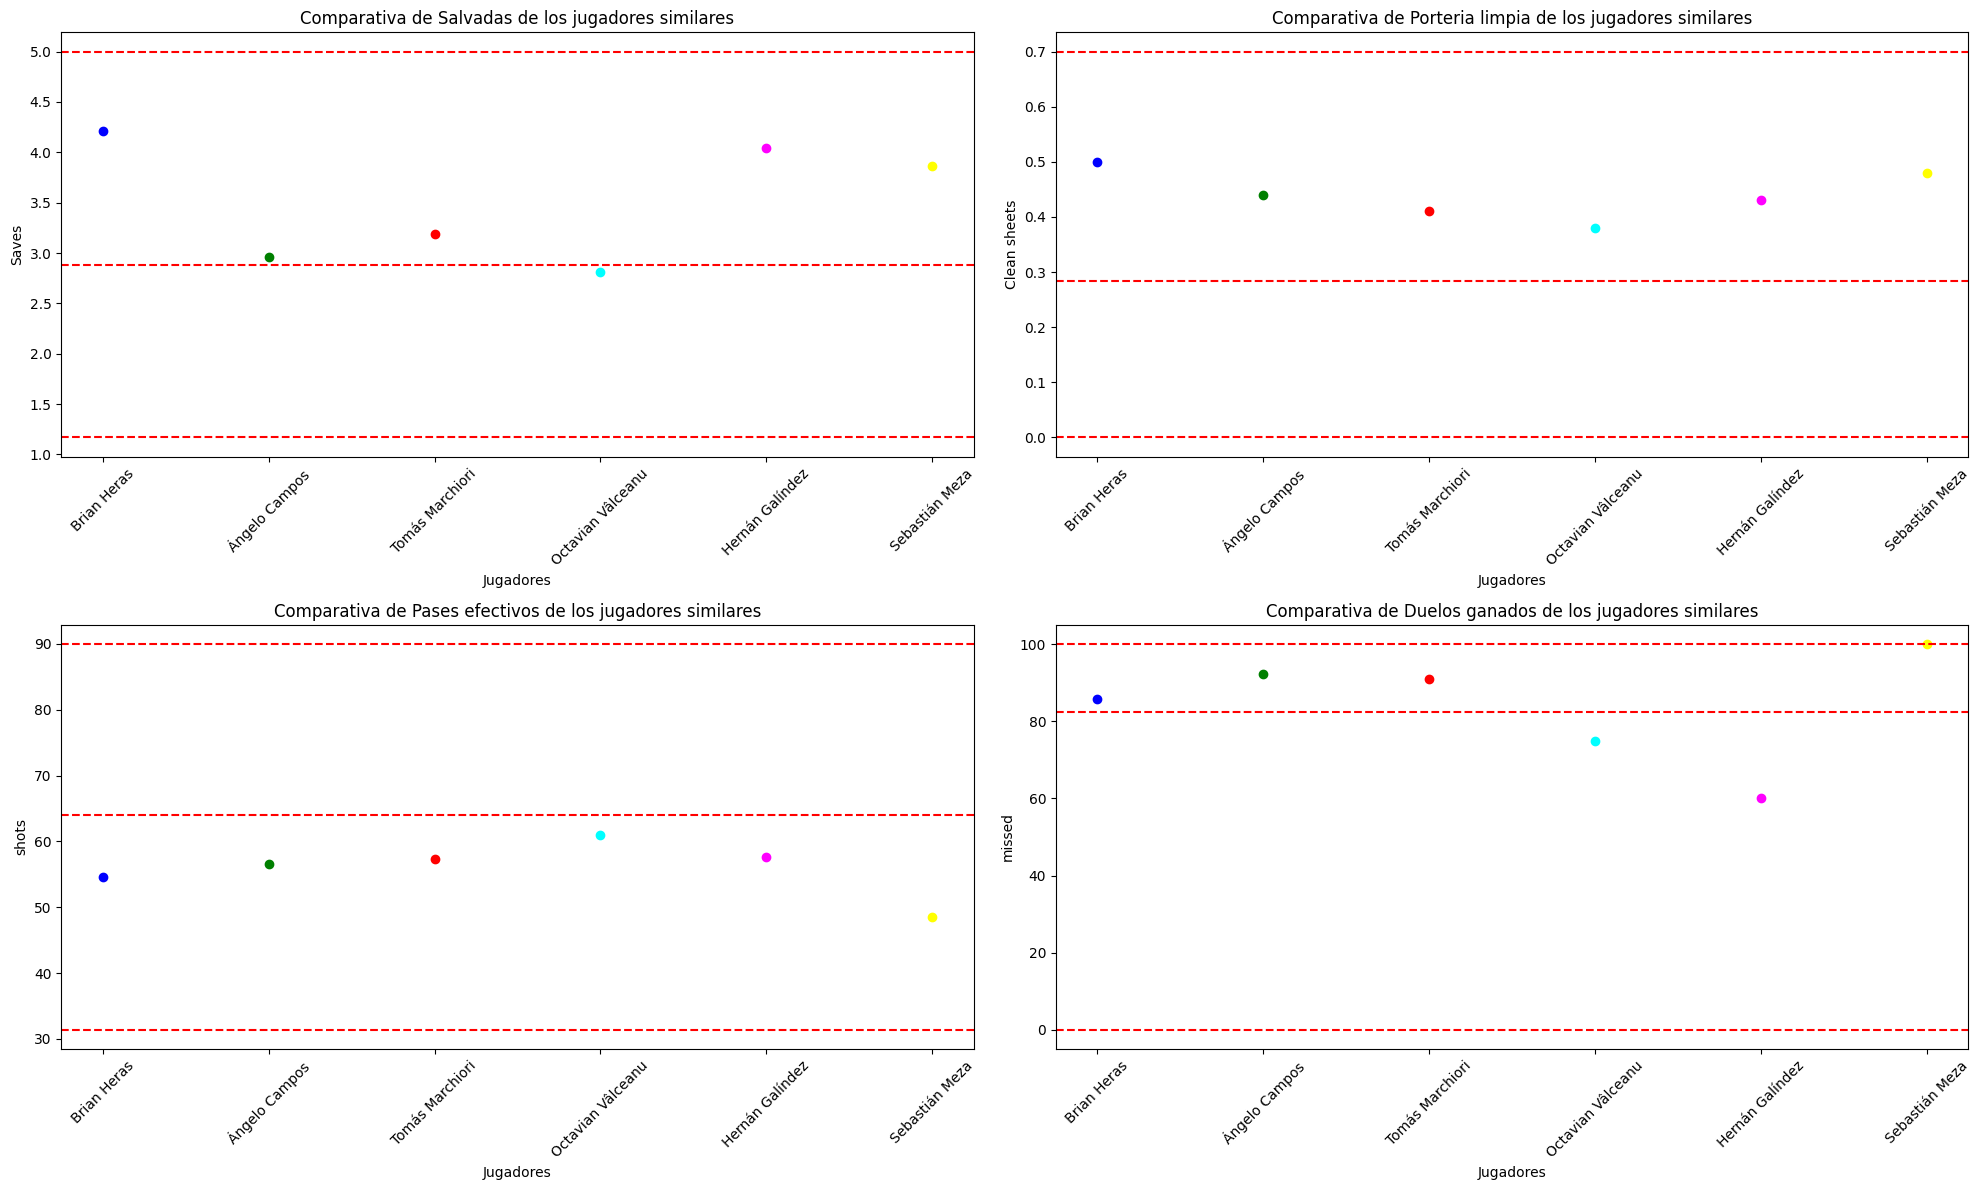

In [19]:
buscar_jugadores_similares('Brian Heras', caracteristicas_grafico)